# 2. Stoichiometry calculation and ternary plot of apatite

pyAp allows users to calculate the stoichiometry and mole fractions of components in apatite using functions `ApStoic.py` and `ApStoic_Ketcham.py`.  

The stoichiometry calculation method was adapted from Ketcham (2015) https://doi.org/10.2138/am-2015-5171  

The results can be plotted in the F-Cl-OH ternary diagram by calling functions in `ApThernary.py`.  See an example below.

### Import releavant modules and data

Import modules

In [1]:
import matplotlib.pyplot as plt, pandas as pd, math
from pyAp.ApStoic import stoi_
from pyAp import ApTernary
from pyAp.ApStoic_Ketcham import stoi_ketcham

Import data 

In [2]:
data = pd.read_excel('data_ap_major_volatile.xlsx')

### Stoichiometry calculation 
Use `assume_oxy=26` for F- or Cl-apatite; `assume_oxy=25` for OH-apatite. The default is 26 if no values are assigned. 

In [3]:
results_stoi = stoi_(data,assume_oxy = 26) 
results_stoi

,SI,TI,AL,FE,CA,MG,MN,K,NA,P,S,C,XF,XCL,XOH,CE,SR,"stoi,(Ca/P-5/3)/(5/3)*100%",sample
0,0.017412,0.013097,0.020520,0.014561,10.072936,0.025958,0.014746,0.022210,0.033756,5.895973,0.026133,0.002377,0.825950,0.073766,0.100284,0.012748,0.010095,3.656599,Ap1
1,0.017514,0.013175,0.020641,0.014647,10.132331,0.026111,0.014833,0.022341,0.033955,5.930739,0.026287,0.002391,0.692350,0.059361,0.248289,0.012823,0.010155,3.656599,Ap2
2,0.017419,0.013103,0.020528,0.014567,10.077123,0.025968,0.014752,0.022219,0.033770,5.898424,0.026144,0.002378,0.771207,0.118075,0.110718,0.012753,0.010100,3.656599,Ap3


Use an oxygen number between 25 and 26 using `stoi_ketcham()` function in module `ApStoic_Ketcham.py` 

In [4]:
results_ketc = stoi_ketcham(data)

The calculated oxygen number should fall between 25 and 26

In [5]:
results_ketc['OXYGEN NUMBER']

0    25.896121
1    25.744319
2    25.885361
Name: OXYGEN NUMBER, dtype: float64

### Plot apatite on F-Cl-OH ternary diagram

#### Plot F-Cl-OH mole fractions calculated above

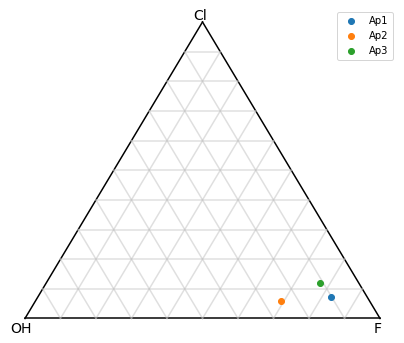

In [6]:
# set up a figure for ternary plot
fig1 = plt.figure()
fig1.set_size_inches(7, 6)

# plot ternary (w/o data)  
ApTernary.ternary(fig1)

for idx, value in results_stoi.iterrows():

    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()

#### Plot apatite F-Cl-OH mole fractions from files

load data

In [7]:
df = pd.read_excel('data_calc_water.xlsx')

plot ternary

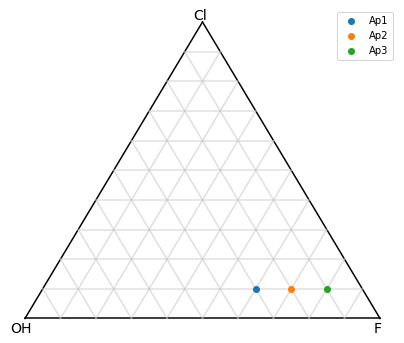

In [8]:
fig2 = plt.figure()
fig2.set_size_inches(7, 6)

# plot ternary (w/o data)  
ApTernary.ternary(fig2)
for idx, value in df.iterrows():

    x_f = value['XF']
    x_cl = value['XCL']
    x = (x_f + x_cl/2) * 100
    y = x_cl*math.sqrt(3)*50

    if x > 100:
        x = 100
    if y > math.sqrt(3)*50:
        y = math.sqrt(3)*50
        
    plt.plot(x,y,'o',label=value['sample'])

plt.legend(loc='best')
plt.show()